# Практическая работа №3: Статистический анализ социальных сетей
Выполнил студент гр. 0382 Самулевич Василий. Вариант №45

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.


## Основные теоретические положения

**Диада** $-$ элемент сети, представляющий собой пару акторов и (возможную) связь между ними: $D_{ij}=(X_{ij}, X_{ji}), i\neq j$.

**Цензус диад** $-$ тройка чисел $M, A, N$, где:

$M = \sum_{i<j} X_{ij} X_{ji}$

$A = X_{++} - 2M$

$N = C^2_g - A - M$

**Индекс взаимности Каца-Пауэлла** (Reciprocity of Katz and Powell) $-$ характеристика измерения тенденции акторов в группе. Данный индекс оценивает тенденцию акторов в группе к взаимному выбору друг друга. 

$-\infty < \rho_{кр} \leqslant 1$.

Если $\rho_{кр} = 0$, то акторы не имеют склонности взаимно выбирать друг друга.

Если $\rho_{кр} = 1$, то акторы показывают максимальную тенденцию к взаимному выбору друг друга.

Если $\rho_{кр} < 0$, то акторы склонны образовывать односторонние связи или не образовывать их вообще.

Индекс взаимности основан на ожидании количества взаимных диад, предполагая, что выбор делается акторами случайным образом. Выбор может быть фиксированным или свободным.

Для фиксированного выбора из $d$ акторов:

По методу моментов оценка $\hat{\rho}_{кр} = \displaystyle{\frac{2(g-1)M - gd^2}{gd(g - d - 1)}}$.

Вероятность того, что связь будет взаимной для двух акторов:

$\displaystyle{P(i \rightarrow j \wedge j \rightarrow i) = \frac{d}{g - 1}\left( \frac{d}{g - 1} + \rho_{кр} \frac{g - 1 - d}{g - 1} \right)}.$

Для свободного выбора:

По методу моментов оценка $\hat{\rho}_{кр} = \displaystyle{\frac{2(g-1)^2M - L^2 + L_2}{L(g - 1)^2 - L^2 - L_2}}$.

Вероятность того, что связь будет взаимной для двух акторов (для каждого из акторов):

$P = \displaystyle{\frac{x_{i+}x_{j+}}{(g - 1)^2}}.$

**Индекс взаимности Бандиопадхьяйя** $-$ индекс, основанный на максимальной и минимальной значениях количества диад в сети. 

$\rho_B = \displaystyle{\frac{M - M_{\min}}{M_{\max} - M_{\min}}},$

где $M_{\min} = \max f(t), 0 \leqslant t \leqslant g$, 

$M_{\max} = \lfloor 0.5 \sum^g_{i = 1} x_{i+} - \max g(t)\rfloor, 0 \leqslant t \leqslant g,$

$f(t) = \sum^t_{i=1} x_{i+} - t(g - 1) - C^2_g,$

$g(t) = \sum^t_{i=1} x_{i+} - t(t - 1) - \sum^g_{i=t+1} \min (t, x_{i+}).$

**Вычисление доверительного интервала для оценки P.**

Оценка параметра $P$:

$\hat{P} = \displaystyle{\frac{\sum_{i = 1}^g \sum_{j = 1}^g x_{ij}}{g(g-1)} = \frac{l}{g(g - 1)}}.$

Доверительный интервал: $\hat{P}_{lower} \leqslant P \leqslant \hat{P}_{upper}$.

$\hat{P}_{lower} = \displaystyle{\hat{P} - z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$

$\hat{P}_{lower} = \displaystyle{\hat{P} + z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$

$z_{\alpha/2}$ вычисляется из $\Phi(z_{\alpha/2}) = 0.5 - 0.5 \alpha$, где $\alpha - $ некоторый уровень значимости, $(1 - \alpha) - $ доверительная надёжность.

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы


Подключение используемых библиотек:

In [33]:
install.packages("igraph")
install.packages("statnet")
install.packages("DescTools")
library(igraph)
library(statnet)
library(DescTools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘rootSolve’, ‘e1071’, ‘lmom’, ‘mvtnorm’, ‘expm’, ‘Rcpp’, ‘Exact’, ‘gld’, ‘BH’



Attaching package: ‘DescTools’


The following object is masked from ‘package:network’:

    %c%


The following object is masked from ‘package:igraph’:

    %c%




1) С помощью библиотеки igraph смоделировать случайный орграф $\mathscr{G}_d$ на основе модели Эрдеша-Реньи: $\mathscr{G}_d = \mathscr{G}_d(g, p)$, где $g$ - количество акторов, $p$ - вероятность появления дуги между акторами.Ознакомьтесь с данной моделью и опишите её.

In [6]:
task_one<- function(g,p){
  graph <- erdos.renyi.game(g,p,type = "gnp",directed = TRUE);
  return(graph);
}


graph <- task_one(70,0.62)

Описание модели: в данной модели граф строится путем случайного добавления ребер.Каждое ребро включается в граф с вероятностью p,независимо от остальных ребер.Все графы с n узлами и M вершинами имеют одинаковую вероятность $p^M(1-p)^{{n \choose 2}-M}$

2) Отобразить полученный орграф.

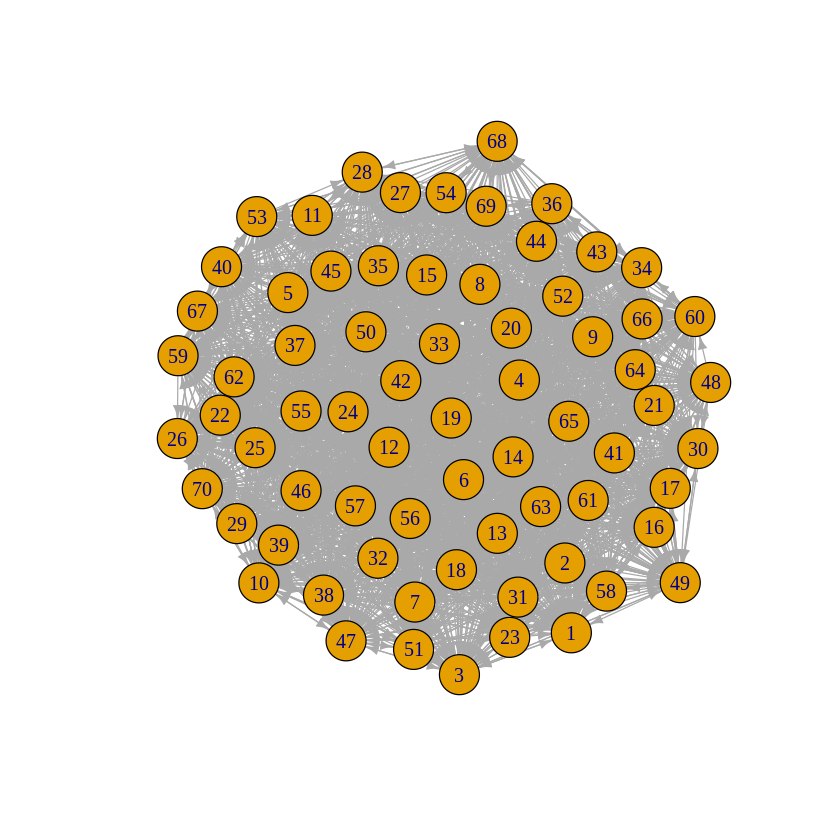

In [7]:
task_two <- function(graph){
  plot.igraph(graph,edge.arrow.size = 0.5);
}
task_two(graph)

3) Вычислить пятичисловую сводку для графа $\mathscr{G}_d$.

In [14]:
task_three <- function(graph){
    res = c()
    
    vertex_count <- length(V(graph))
    
    density <- edge_density(graph);
 
    components_count <- count_components(graph, mode = "strong")
    
    diameter <- diameter(graph,directed = TRUE)
    
    net <- as.network(as.matrix(graph),matrix.type = "adjacency",directed = TRUE);
    clustering_coefficient <- gtrans(net,mode = "digraph")
    
    return (c(size = vertex_count,density = density,components_count = components_count,
              diameter = diameter, clustering_coefficient = clustering_coefficient))
}
print(task_three(graph))

<sparse>[ <logic> ]: .M.sub.i.logical() maybe inefficient



                  size                density       components_count 
            70.0000000              0.6066253              1.0000000 
              diameter clustering_coefficient 
             2.0000000              0.6078745 


4) Вычислить цензус диад.Сделать выводы.

In [15]:
task_four <-function(graph){
  return (dyad_census(graph));
}
print(task_four(graph))

$mut
[1] 889

$asym
[1] 1152

$null
[1] 374



Выводы: Результаты вычислений говорят о том,что граф содержит 889 взаимных(есть свяь в обе стороны),1152 асимметричных(есть связь только в одну сторону) и 374 нулевых диады(диад,между элементами которой нет связи ни в одну сторону).Отсюда M=889, A= 1152, N=374

5) Вычислить оценку индекса взаимности Каца—Пауэла при фиксированом выборе акторов 𝑑 и при свободном выборе. Сделать выводы.<br><br>
Для фиксированного выбора  𝑑 было взято равным 38.

In [22]:
task_five <- function(graph,d){
  res <- list()
  g <-length(V(graph))
  M <- task_four(graph)$mut;
  fixed_choise <- (2*(g-1)*M-g*(d^2))/(g*d*(g-1-d))
  res$fixed_choise <- fixed_choise
  degrees <- igraph::degree(graph,mode="out")
  L <- sum(degrees)
  L_2 <- sum(degrees^2)
  free_choise <- (2*(g-1)^2*M-L^2+L_2)/(L*(g-1)^2-L^2+L_2)
  res$free_choise <- free_choise
  return (res)
}
print(task_five(graph,38))

$fixed_choise
[1] 0.2619694

$free_choise
[1] 0.0007393331



Выводы: При фикисированном выборе тенденция отвечать взаимностью на связь невелика, но присутсвет. При свободном выборе можно считать, что такой тенденции нет(т.к. индекс взаимности практически равен 0).

6) Вычислить вероятность того, что связь будет взаимной для каждого случая.

In [28]:
task_six <- function(graph,d){
  g <- length(V(graph))
  p_fix <- task_five(graph,d)$fixed_choise;
  p_i_j <- (d/(g-1))*(d/(g-1)+p_fix*(g-1-d)/(g-1))
  
  res <- list()
  
  free_res <-c()
   degrees <- igraph::degree(graph,mode="out");
  for(i in 2:length(degrees)){
    for(j in 1:(i-1)){
      free_res[length(free_res)+1] <- degrees[i]*degrees[j]/((g-1)^2);
    }
  }
   res$free_choise <- mean(free_res)
   res$fixed_choise <- p_i_j
   return(res)
}
print(task_six(graph,38))

$free_choise
[1] 0.3679395

$fixed_choise
[1] 0.3681159



7) Вычислить индекс взаимности Бандиопадхьяйя. Сделать выводы

In [29]:
f_t <-function(graph,t){
  g <- length(V(graph))
  t_degrees <- igraph::degree(graph,mode="out")[1:t];
  return(sum(t_degrees)-t*(g-1)-(t*(t-1))/2)
}

g_t <-function(graph,t){
  g <- length(V(graph))
  degrees <- igraph::degree(graph,mode="out");
  if(t==g){
    second_sum_values <- 0
  }
  else{
  second_sum_values <- sapply((t+1):g, function(x) min(t,degrees[x]))
  }
  
  second_sum <- sum(second_sum_values)
  return(sum(degrees[1:t])-t*(t-1)-second_sum)
}

task_seven <- function(graph){
  g <- length(V(graph))
  M <- task_four(graph)$mut
  f_values <- sapply(0:g,function(x) f_t(graph,x))
  g_values <-sapply(0:g,function(x) g_t(graph,x))
  degree_sum <- sum(igraph::degree(graph,mode="out"))
  M_min <- max(f_values)
  M_max <- floor((degree_sum-max(g_values))/2)
  return((M-M_min)/(M_max-M_min))
}

print(task_seven(graph))

[1] 0.6045519


Выводы: Индекс взаимности Бандиопадхьяйя получился больше индекса взаимности Каца—Пауэла,что говорит о том, что, скорее всего, он был посчитан верно.

8) Проверить нулевую гипотезу о том, что число дуг $L$ в орграфе $\mathscr{G}_d$ имеет биномиальное распределение $L ∼ Bin(g(g−1), 1/2)$ при уровне значимости $\alpha = 0.02$. Определить максимальный уровень значимости, при котором нулевая гипотеза не отвергается.

In [30]:
task_eight_and_nine <-function(graph,alpha,p){
  edges_count <-sum(as.matrix(graph))
  g <-length(V(graph))
  res <- binom.test(edges_count,g*(g-1),p);
  if(res$p.value >= alpha){
    print("Нулевая гипотеза явл. правдивой");
  }
  else{
    print("Нулевая гипотеза не явл. правдивой");
  }
  print(paste("максимальный уровень значимости",res$p.value,sep="-"));
}

print(task_eight_and_nine(graph,0.02,1/2))

[1] "Нулевая гипотеза не явл. правдивой"
[1] "максимальный уровень значимости-5.74599187816202e-50"
[1] "максимальный уровень значимости-5.74599187816202e-50"


9) Проверить нулевую гипотезу о том, что число дуг $L$ в орграфе $\mathscr{G}_d$ имеет биномиальное распределение $L ∼ Bin(g(g−1), 0.69)$ при уровне значимости $\alpha = 0.02$. Определить максимальный уровень значимости, при котором нулевая гипотеза не отвергается.

In [31]:
print(task_eight_and_nine(graph,0.02,0.69))

[1] "Нулевая гипотеза не явл. правдивой"
[1] "максимальный уровень значимости-1.44597397299585e-34"
[1] "максимальный уровень значимости-1.44597397299585e-34"


10) Построить доверительный интервал для оценки параметра $p$ с доверительной надёжностью $(1 - \alpha)$. Сделать выводы.

In [35]:
task_ten <- function(graph,alpha){
  edges_count <-sum(as.matrix(graph))
  g <- length(V(graph))
  res <-BinomCI(edges_count,g*(g-1),conf.level = 1- alpha)
  print(paste("доверительный интервал-[",res[2],", ",res[3],"]",sep=""))
}
task_ten(graph,0.02)

[1] "доверительный интервал-[0.590162876467931, 0.622848966677479]"


Выводы: Истинное значение p=0.62 принадлежит полученному доверительному интервалу.

## Выводы

В ходе данной практической работы был проведен статистический анализ случайно созданного ориентированного графа с использованием библиотек igraph, statnet,Desctools а также встроенных функций языка R. Были получены навыки работы для оценки параметров, нахождения доверительных интервалов